## 원, 삼각형, 사각형 구분하기
- 어려운 태스트 문제를 데이터 부풀리기를 이용하여 데이터를 많이 생성
- 기존의 CNN 모델을 그대로 사용

- 데이터 탐색

In [1]:
from PIL import Image
from glob import glob
import matplotlib.pyplot as plt

- 데이터셋 생성하기

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1/255.,
    rotation_range=15,           # randomly rotate images in the range (deg 0 to 15)
    width_shift_range=0.1,       # randomly shift images horizontally
    height_shift_range=0.1,      # randomly shift images vertically
    shear_range=0.5,             # set range for random shear(도형의 기울기)
    zoom_range=[0.8, 1.5],       # set range for random zoom(0.8 ~ 1.5배 크기로 임의로 확대/축소)
    horizontal_flip=True,        # randomly flip images (수평으로)
    vertical_flip=False,         # randomly flip images (수직으로)
    fill_mode='nearest'          # set mode for filling points outside the input boundaries
)

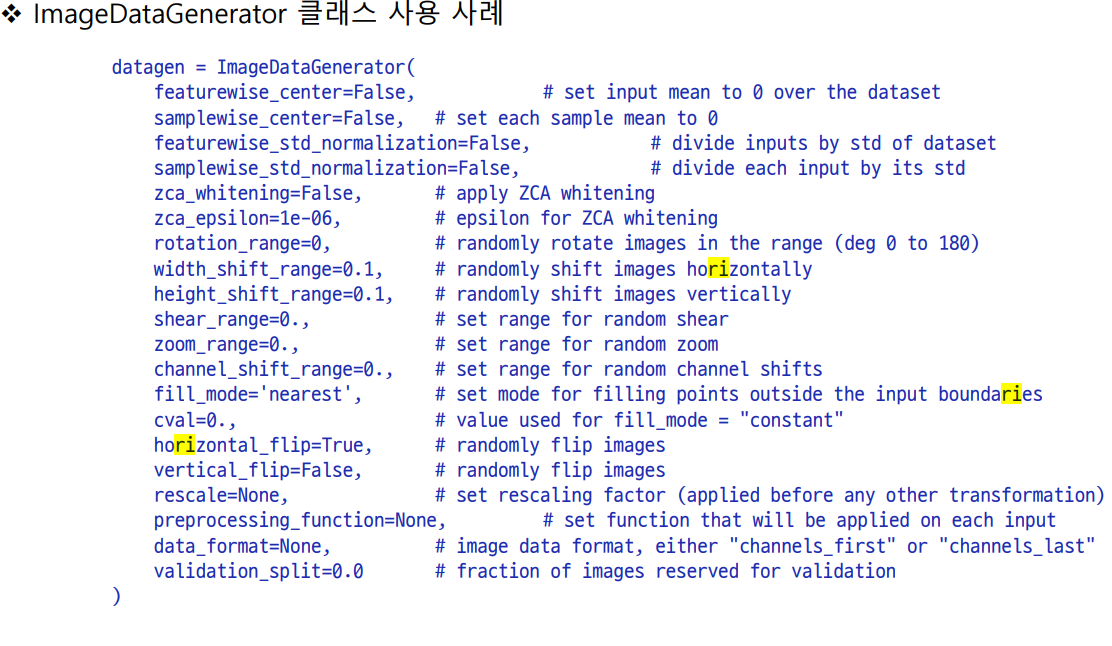
- 선생님 강의 13.합성공신경망(CNN) 28page

In [3]:
from tensorflow.keras.preprocessing.image import img_to_array, load_img

img = load_img('data/hard_handwriting_shape/train/triangle/triangle001.png')
x = img_to_array(img)
x.shape

(24, 24, 3)

In [4]:
# shape을 (1, 24, 24, 3)으로 변경
x = x.reshape(-1, 24, 24, 3)

- 데이터 부풀리기를 통하여 만들어지는 새로운 도형 이미지

In [6]:
# preview 디렉토리 만들기
import os
if not os.path.exists('data/preview'):
    os.mkdir('data/preview')

In [11]:
count = 0
for _ in train_datagen.flow(x, batch_size=1, save_to_dir='./data/preview', save_prefix='pre'):
    count += 1
    if count >= 30:
        break

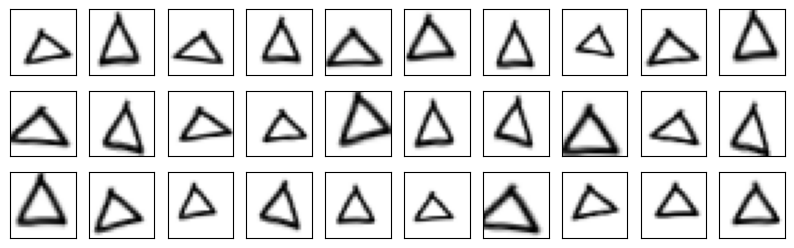

In [12]:
plt.figure(figsize=(10,3))
for i,fname in enumerate(glob('data/preview/*.png')):
    img = Image.open(fname)
    plt.subplot(3, 10, i+1)
    plt.imshow(img), plt.xticks([]), plt.yticks([])
plt.show()

# train 데이터만 이렇게 만들어서 넣어주고, test데이터를 그대로 사용해도 됨

- data generator

In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255.)
train_data_generator = train_datagen.flow_from_directory(
    'data/hard_handwriting_shape/train',
    target_size=(24,24),
    batch_size=3,
    class_mode='categorical'
)

Found 45 images belonging to 3 classes.


In [14]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

test_datagen = ImageDataGenerator(rescale=1/255.)
test_data_generator = test_datagen.flow_from_directory(
    'data/hard_handwriting_shape/test',
    target_size=(24,24),
    batch_size=3,
    class_mode='categorical'
)
# 15개의 이미지가 3개의 클래스에 속해있다.

Found 15 images belonging to 3 classes.


In [15]:
test_data_generator.filenames[0]

'circle\\circle021.png'

- 모델 정의/설정/학습/평가

In [16]:
import numpy as np
import tensorflow as tf
seed = 2023
tf.random.set_seed(seed)
np.random.seed(seed)

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten

In [18]:
model = Sequential([
    Conv2D(32, (3,3), input_shape=(24,24,3), activation='relu'),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(3, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 22, 22, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 20, 20, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2  (None, 10, 10, 64)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 6400)              0         
                                                                 
 dense (Dense)               (None, 128)               819328    
                                                                 
 dense_1 (Dense)             (None, 3)                 387       
                                                        

In [19]:
model.compile('adam', 'categorical_crossentropy', ['accuracy'])  #metricks 안써도됨

In [21]:
model.fit(
    train_data_generator,                #X,Y데이터 모두 제공해주는 코드
    epochs=300, verbose=0,
    validation_data=test_data_generator,
    steps_per_epoch=15,         # 총 데이터수(45) / batch_size(3) = 15
    validation_steps=5          # 총 데이터수(15) / batch_size(3) = 5
)

Epoch 1/300
15/15 [==============================] - 0s 29ms/step - loss: 5.1948e-06 - accuracy: 1.0000 - val_loss: 6.0728 - val_accuracy: 0.3333
Epoch 2/300
15/15 [==============================] - 0s 25ms/step - loss: 4.8928e-06 - accuracy: 1.0000 - val_loss: 6.0949 - val_accuracy: 0.3333
Epoch 3/300
15/15 [==============================] - 0s 25ms/step - loss: 4.7021e-06 - accuracy: 1.0000 - val_loss: 6.1029 - val_accuracy: 0.3333
Epoch 4/300
15/15 [==============================] - 0s 21ms/step - loss: 4.3392e-06 - accuracy: 1.0000 - val_loss: 6.1325 - val_accuracy: 0.3333
Epoch 5/300
15/15 [==============================] - 0s 21ms/step - loss: 4.1326e-06 - accuracy: 1.0000 - val_loss: 6.1747 - val_accuracy: 0.3333
Epoch 6/300
15/15 [==============================] - 0s 22ms/step - loss: 3.9127e-06 - accuracy: 1.0000 - val_loss: 6.1886 - val_accuracy: 0.3333
Epoch 7/300
 1/15 [=>............................] - ETA: 0s - loss: 4.9670e-06 - accuracy: 1.0000

KeyboardInterrupt: 

In [20]:
model.evaluate(test_data_generator)

5/5 [==============================] - 0s 5ms/step - loss: 0.0193 - accuracy: 1.0000


[0.019273845478892326, 1.0]